In [ ]:
from tensorflow import keras
import json
import os
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/archive_json/archive_json/ann_train_val'

In [ ]:
labels_change = {
    'call': 0,
    'dislike': 1,
    'fist': 2,
    'four': 3,
    'like': 4,
    'mute': 5,
    'ok': 6,
    'one': 7,
    'plam': 8,
    'peace_inverted': 9,
    'peace': 10,
    'rock': 11,
    'stop_inverted': 12,
    'stop': 13,
    'three': 14,
    'three2': 15,
    'two_up_inverted': 16,
    'two_up': 17
}
labels_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
change_lr = {
    'right': 1,
    'left': 2
}
lr_list = [1, 2]

In [ ]:
datas = []
print('check')
for path in os.listdir(data_path):
    file = os.path.join(data_path, path)
    with open(file, 'r') as f:
        data = json.load(f)
        for key in data.keys():
            for i in data[key]['labels']:
                if i!='no_gesture':
                    index = data[key]['labels'].index(i)
                    label = labels_change.get(data[key]['labels'][index])
                    lr = change_lr.get(data[key]['leading_hand'])
                    if len(data[key]['landmarks'][index]) == 21 and label in labels_list and \
                        len(data[key]['bboxes'][index]) ==4 and lr in lr_list:
                        for check in data[key]['landmarks'][index]:
                            check[0] = float(check[0])
                            check[1] = float(check[1])
                        bboxes = [float(i) for i in data[key]['bboxes'][index]]
                        _data = data[key]['landmarks'][index]
                        _data.append([float(data[key]['leading_conf']), float(lr)])
                        _data.append(bboxes[:2])
                        _data.append(bboxes[2:])
                        datas.append([_data, label])

np.random.shuffle(datas)
datas[0]

check


[[[0.6575845273904011, 0.3352201047796631],
  [0.6409177215550115, 0.32360414887738465],
  [0.6332512399292427, 0.3038313050418317],
  [0.6454348817184032, 0.28706116825467465],
  [0.6620394352435972, 0.27696871878120183],
  [0.6358586558935859, 0.28703840563709615],
  [0.6341957530669794, 0.26498378491272895],
  [0.6352849590990315, 0.25157365621296285],
  [0.6373779374426136, 0.23975156189808425],
  [0.6513873062151827, 0.2888969770576113],
  [0.6592167474895249, 0.2759067927855578],
  [0.6555865780482357, 0.2889051342781153],
  [0.6523061005512398, 0.29825291173844454],
  [0.6657205495908953, 0.2929458961355388],
  [0.6724570772856253, 0.2842820226289248],
  [0.6643596456050842, 0.29867520263728736],
  [0.6602963951929833, 0.3064621610826099],
  [0.6787170188335221, 0.29919988836293215],
  [0.6834041472652937, 0.290982398655585],
  [0.675381186789233, 0.30162233342458245],
  [0.6706561206614973, 0.3079005848377555],
  [1.0, 2.0],
  [0.6177995, 0.22977696],
  [0.08110291, 0.11935337]

In [ ]:
inputs = []
labels = []
for x, y in datas:
    inputs.append(np.array([np.array(i, dtype=np.float32) for i in x]))
    labels.append(y)

inputs = np.array(inputs)
labels = np.array(labels)   


# inputs = tf.convert_to_tensor(inputs)
# labels = tf.convert_to_tensor(labels)

len(inputs), labels[0] ,inputs[0]

(475600,
 7,
 array([[0.65758455, 0.3352201 ],
        [0.6409177 , 0.32360414],
        [0.63325125, 0.3038313 ],
        [0.64543486, 0.28706115],
        [0.66203946, 0.27696872],
        [0.63585865, 0.28703842],
        [0.63419574, 0.26498377],
        [0.63528496, 0.25157365],
        [0.6373779 , 0.23975156],
        [0.65138733, 0.28889698],
        [0.65921676, 0.2759068 ],
        [0.6555866 , 0.28890514],
        [0.6523061 , 0.2982529 ],
        [0.6657205 , 0.2929459 ],
        [0.6724571 , 0.28428203],
        [0.6643596 , 0.2986752 ],
        [0.6602964 , 0.30646217],
        [0.678717  , 0.29919988],
        [0.68340415, 0.2909824 ],
        [0.6753812 , 0.30162233],
        [0.67065614, 0.30790058],
        [1.        , 2.        ],
        [0.6177995 , 0.22977696],
        [0.08110291, 0.11935337]], dtype=float32))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, labels, test_size = 0.3, random_state=0)

In [ ]:
X_train[:3]

array([[[0.30107048, 0.54947186],
        [0.33385834, 0.5320082 ],
        [0.34481272, 0.50400376],
        [0.31131557, 0.4760226 ],
        [0.28074613, 0.4603039 ],
        [0.3498916 , 0.4502597 ],
        [0.37281144, 0.40889907],
        [0.38572475, 0.38335603],
        [0.39492562, 0.3593703 ],
        [0.31744134, 0.44308242],
        [0.3250716 , 0.39553267],
        [0.3294859 , 0.36750466],
        [0.3330412 , 0.34196648],
        [0.2893431 , 0.44767985],
        [0.28725675, 0.40603104],
        [0.2904566 , 0.37996322],
        [0.2922825 , 0.35548863],
        [0.26370445, 0.46566072],
        [0.2608055 , 0.4341734 ],
        [0.2707734 , 0.44435143],
        [0.28056288, 0.46093994],
        [1.        , 1.        ],
        [0.24079333, 0.32659572],
        [0.1700434 , 0.2311545 ]],

       [[0.24673335, 0.5698052 ],
        [0.27630863, 0.5549059 ],
        [0.29046834, 0.5258405 ],
        [0.26278484, 0.5007546 ],
        [0.23317745, 0.48845977],
        [0.2

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.models import Model


In [ ]:


# Tạo tensor đầu vào
inputs = tf.keras.Input(shape=(24,2))

# Thêm lớp Flatten để chuyển tensor đầu vào thành một vector 1D
x = tf.keras.layers.Flatten()(inputs)

# Thêm các lớp ẩn với số đơn vị tăng dần và hàm kích hoạt ReLU
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) # Thêm lớp Dropout
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) # Thêm lớp Dropout
x = tf.keras.layers.Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x) # Thêm lớp Dropout

# Thêm lớp đầu ra với 18 đơn vị và hàm kích hoạt softmax
outputs = tf.keras.layers.Dense(18, activation='softmax')(x)

# Tạo mô hình với đầu vào và đầu ra
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Biên dịch mô hình với hàm mất mát categorical_crossentropy và thuật toán tối ưu Adam
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Đọc dữ liệu từ tập tin hoặc database và chia thành các tập train, validation và test
# X_train, y_train, X_val, y_val, X_test, y_test = ...



In [ ]:
y_train = tf.one_hot(y_train, 18)
y_test = tf.one_hot(y_test, 18)
y_train[0]

<tf.Tensor: shape=(18,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0.], dtype=float32)>

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
10404/10404 [==============================] - 60s 5ms/step - loss: 0.6529 - accuracy: 0.7507 - val_loss: 0.3120 - val_accuracy: 0.8921
Epoch 2/50
10404/10404 [==============================] - 56s 5ms/step - loss: 0.3841 - accuracy: 0.8614 - val_loss: 0.1973 - val_accuracy: 0.9400
Epoch 3/50
10404/10404 [==============================] - 66s 6ms/step - loss: 0.3254 - accuracy: 0.8887 - val_loss: 0.2424 - val_accuracy: 0.9254
Epoch 4/50
10404/10404 [==============================] - 57s 5ms/step - loss: 0.2983 - accuracy: 0.8983 - val_loss: 0.1812 - val_accuracy: 0.9358
Epoch 5/50
10404/10404 [==============================] - 56s 5ms/step - loss: 0.2757 - accuracy: 0.9067 - val_loss: 0.1679 - val_accuracy: 0.9381
Epoch 6/50
10404/10404 [==============================] - 56s 5ms/step - loss: 0.2574 - accuracy: 0.9144 - val_loss: 0.1047 - val_accuracy: 0.9734
Epoch 7/50
10404/10404 [==============================] - 55s 5ms/step - loss: 0.2380 - accuracy: 0.9225 - val_loss: 0

In [ ]:
import matplotlib.pyplot as plt # for plotting

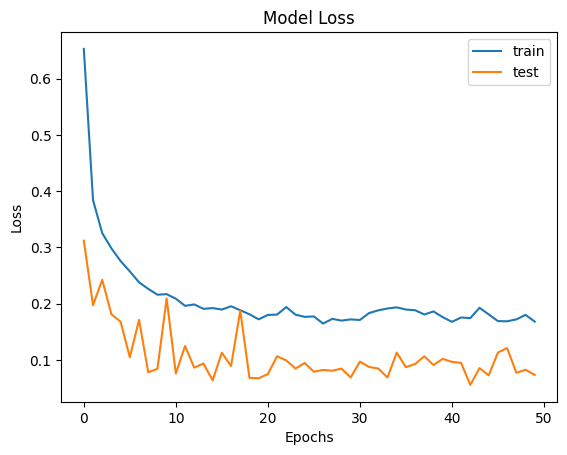

In [ ]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

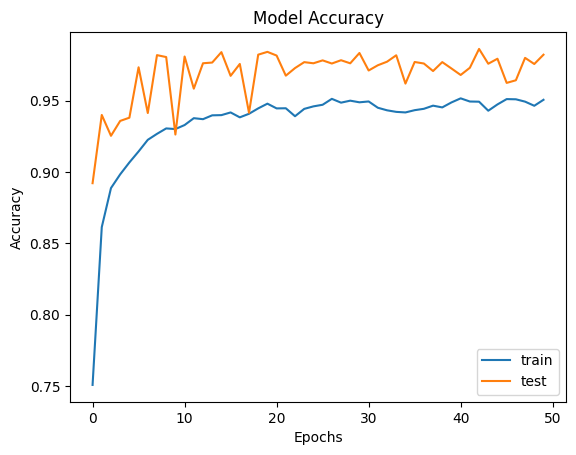

In [ ]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
test_path = '/content/drive/MyDrive/archive_json/archive_json/ann_test'

In [ ]:
labels_change = {
    'call': 0,
    'dislike': 1,
    'fist': 2,
    'four': 3,
    'like': 4,
    'mute': 5,
    'ok': 6,
    'one': 7,
    'plam': 8,
    'peace_inverted': 9,
    'peace': 10,
    'rock': 11,
    'stop_inverted': 12,
    'stop': 13,
    'three': 14,
    'three2': 15,
    'two_up_inverted': 16,
    'two_up': 17
}
labels_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
change_lr = {
    'right': 1,
    'left': 2
}
lr_list = [1, 2]

In [ ]:
datas_test = []
print('check')
for path in os.listdir(data_path):
    file = os.path.join(data_path, path)
    with open(file, 'r') as f:
        data = json.load(f)
        for key in data.keys():
            for i in data[key]['labels']:
                if i!='no_gesture':
                    index = data[key]['labels'].index(i)
                    label = labels_change.get(data[key]['labels'][index])
                    lr = change_lr.get(data[key]['leading_hand'])
                    if len(data[key]['landmarks'][index]) == 21 and label in labels_list and \
                        len(data[key]['bboxes'][index]) ==4 and lr in lr_list:
                        for check in data[key]['landmarks'][index]:
                            check[0] = float(check[0])
                            check[1] = float(check[1])
                        bboxes = [float(i) for i in data[key]['bboxes'][index]]
                        _data = data[key]['landmarks'][index]
                        _data.append([float(data[key]['leading_conf']), float(lr)])
                        _data.append(bboxes[:2])
                        _data.append(bboxes[2:])
                        datas_test.append([_data, label])

check


In [ ]:
inputs_test = []
labels_test = []
for x, y in datas_test:
    inputs_test.append(np.array([np.array(i, dtype=np.float32) for i in x]))
    labels_test.append(y)

inputs_test = np.array(inputs_test)
# labels_test = np.array(labels_test)

In [ ]:
inputs_test[0]

array([[0.27168712, 0.46487904],
       [0.26852092, 0.42164376],
       [0.28133026, 0.37492514],
       [0.2878232 , 0.33870202],
       [0.280266  , 0.31127104],
       [0.33457395, 0.36746413],
       [0.3947507 , 0.37570223],
       [0.37914336, 0.39035052],
       [0.35594124, 0.39425883],
       [0.34898886, 0.39015397],
       [0.4029723 , 0.39766818],
       [0.38620234, 0.410297  ],
       [0.36642793, 0.4138897 ],
       [0.3605491 , 0.41641846],
       [0.41133654, 0.41844925],
       [0.39674902, 0.4289947 ],
       [0.37722492, 0.43216828],
       [0.36968553, 0.4436062 ],
       [0.41880187, 0.4350332 ],
       [0.4491082 , 0.43393436],
       [0.47609872, 0.43037668],
       [1.        , 1.        ],
       [0.23925175, 0.28595302],
       [0.25055143, 0.20777626]], dtype=float32)

In [ ]:

predictions = model.predict(np.reshape(inputs_test, (-1, 24, 2)))
# for test, label in zip(inputs_test, labels_test):
#   predictions = model.predict(np.reshape(test, (-1, 24, 2)))
#   if np.argmax(predictions)!=label:
#     d+=1
#   print(np.argmax(predictions), label)

print(predictions)

14863/14863 [==============================] - 28s 2ms/step
[[9.9978369e-01 1.7163428e-09 1.3554472e-06 ... 9.5587194e-10
  1.6006865e-09 9.6682387e-14]
 [9.9896646e-01 5.8662970e-08 5.8652295e-06 ... 7.0875288e-09
  5.8935612e-08 4.9492160e-12]
 [9.4344676e-01 4.6068953e-06 8.8087681e-06 ... 8.1512226e-08
  3.1434143e-07 1.1894646e-10]
 ...
 [1.2155611e-08 1.0324636e-07 1.9333580e-11 ... 3.6949131e-03
  8.7966049e-01 8.5733654e-03]
 [5.9936347e-08 5.2388611e-08 5.1219944e-12 ... 1.6754343e-04
  9.5826042e-01 1.0604162e-03]
 [2.8176873e-06 2.5020909e-06 6.6380522e-08 ... 3.2945198e-05
  9.5211625e-01 3.6853901e-04]]


In [ ]:
d = 0

for i in range(len(predictions)):
  check = np.argmax(predictions[i])
  if check == labels_test[i]:
    if predictions[i][check] > 0.8:
      d+=1
      # print(np.argmax(predictions[i]), labels_test[i], predictions[i][check])
print(d)
print(len(predictions))

454578
475600


In [ ]:
model.save('/content/drive/MyDrive/archive_json/hand_modle.h5')
model.save_weights('/content/drive/MyDrive/archive_json/hand_modle_weights.h5')

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
# Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/archive_json/hand_modle.h5')
model.load_weights('/content/drive/MyDrive/archive_json/hand_modle_weights.h5')
tf.saved_model.save(model, '/content/drive/MyDrive/archive_json/hand_saved_model')

In [ ]:
data = [
            [
                [
                    0.4026666978213241,
                    0.3984311500745974
                ],
                [
                    0.4192076711207422,
                    0.37353826805627627
                ],
                [
                    0.44633790528452344,
                    0.35680122632754485
                ],
                [
                    0.46731198616877123,
                    0.34420815195373317
                ],
                [
                    0.47285176516290683,
                    0.3307505228833379
                ],
                [
                    0.4764688608100788,
                    0.36987351863879375
                ],
                [
                    0.49235649381989877,
                    0.3810291481789606
                ],
                [
                    0.47991574830869327,
                    0.38355750145960327
                ],
                [
                    0.4675613541095248,
                    0.38127575295733984
                ],
                [
                    0.47692134274663184,
                    0.38645534892616357
                ],
                [
                    0.48947415389727567,
                    0.39534107208852803
                ],
                [
                    0.47659621174630057,
                    0.39601692900021074
                ],
                [
                    0.4658551593930461,
                    0.39476968460759576
                ],
                [
                    0.4728566745030196,
                    0.40291993223000305
                ],
                [
                    0.4891204160394226,
                    0.4097351644196717
                ],
                [
                    0.477288667534959,
                    0.40951953824082815
                ],
                [
                    0.46594533202927907,
                    0.4073765117679666
                ],
                [
                    0.46496893062328915,
                    0.4175145445677785
                ],
                [
                    0.4896949149805074,
                    0.4278665715225587
                ],
                [
                    0.5034072857288067,
                    0.4360884888763686
                ],
                [
                    0.5164946046013466,
                    0.44184308467165345
                ],
             [1.0, 1.0],
             [
                0.40016984,
                0.3223251],
             [
                0.13044141,
                0.12870407
            ]
            ]
        
]

In [ ]:
inputs_test = []
for x in data:
    inputs_test.append(np.array([np.array(i, dtype=np.float32) for i in x]))

inputs_test = np.array(inputs_test)
inputs_test

array([[[0.4026667 , 0.39843115],
        [0.41920766, 0.37353826],
        [0.4463379 , 0.3568012 ],
        [0.46731198, 0.34420815],
        [0.47285175, 0.33075052],
        [0.47646886, 0.36987352],
        [0.49235648, 0.38102916],
        [0.47991574, 0.3835575 ],
        [0.46756136, 0.38127574],
        [0.47692135, 0.38645536],
        [0.48947415, 0.39534107],
        [0.4765962 , 0.39601693],
        [0.46585515, 0.3947697 ],
        [0.47285667, 0.40291992],
        [0.48912042, 0.40973517],
        [0.47728866, 0.40951952],
        [0.46594533, 0.4073765 ],
        [0.46496892, 0.41751453],
        [0.48969492, 0.42786658],
        [0.5034073 , 0.4360885 ],
        [0.51649463, 0.4418431 ],
        [1.        , 1.        ],
        [0.40016985, 0.3223251 ],
        [0.13044141, 0.12870407]]], dtype=float32)

In [ ]:
predictions = model.predict(np.reshape(inputs_test, (-1, 24, 2)))

print(predictions)
print(np.argmax(predictions))

1/1 [==============================] - 3s 3s/step
[[9.9547285e-01 6.3230131e-05 1.6375594e-06 2.2678565e-10 3.5640344e-03
  6.7442679e-04 1.1381412e-08 1.4123937e-07 2.3740768e-08 4.6541591e-05
  3.7455285e-07 3.5911907e-09 6.7920701e-05 9.1270804e-09 1.2998136e-07
  1.9602346e-06 1.0474575e-04 1.8047889e-06]]
0
